# Comparing Classifiers

In [425]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [293]:
path = "data/bank-additional-full.csv"                    

In [295]:
df = pd.read_csv(path,sep=";") 

## Data Exploration and Cleaning

In [298]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [300]:
df.shape

(41188, 21)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [304]:
#Dataset looks clean (no null values)

In [306]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [308]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [310]:
#Unique values are no and yes

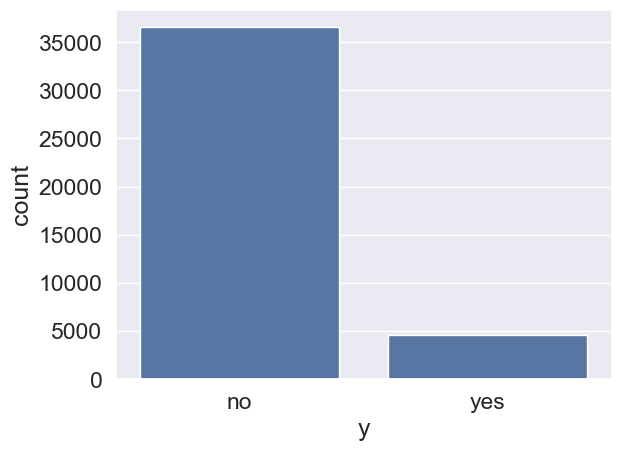

In [312]:
sns.set(font_scale=1.5)
countplt=sns.countplot(x='y', data=df)
plt.show()

In [313]:
#Check for any duplicate values

In [316]:
df.duplicated().sum()

12

In [318]:
#Remove duplicates
df = df.drop_duplicates()

In [320]:
# count of subscribed vs not subscribed
df.y.value_counts() 

y
no     36537
yes     4639
Name: count, dtype: int64

In [322]:
#Find unknown values for object types
print("# Missing value 'job' variable: {0}".format(len(df.loc[df['job'] == "unknown"])))
print("# Missing value 'marital' variable: {0}".format(len(df.loc[df['marital'] == "unknown"])))
print("# Missing value 'education' variable: {0}".format(len(df.loc[df['education'] == "unknown"])))
print("# Missing value 'default' variable: {0}".format(len(df.loc[df['default'] == "unknown"])))
print("# Missing value 'housing' variable: {0}".format(len(df.loc[df['housing'] == "unknown"])))
print("# Missing value 'loan' variable: {0}".format(len(df.loc[df['loan'] == "unknown"])))
print("# Missing value 'contact' variable: {0}".format(len(df.loc[df['contact'] == "unknown"])))
print("# Missing value 'month' variable: {0}".format(len(df.loc[df['month'] == "unknown"])))
print("# Missing value 'day_of_week' variable: {0}".format(len(df.loc[df['day_of_week'] == "unknown"])))
print("# Missing value 'poutcome' variable: {0}".format(len(df.loc[df['poutcome'] == "unknown"])))

# Missing value 'job' variable: 330
# Missing value 'marital' variable: 80
# Missing value 'education' variable: 1730
# Missing value 'default' variable: 8596
# Missing value 'housing' variable: 990
# Missing value 'loan' variable: 990
# Missing value 'contact' variable: 0
# Missing value 'month' variable: 0
# Missing value 'day_of_week' variable: 0
# Missing value 'poutcome' variable: 0


In [325]:
#Remove unknown values which are not useful
df.drop(df[df['marital'] == "unknown"].index, inplace=True)


In [327]:
df.shape

(41096, 21)

In [329]:
df.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000
mean,40.023311,258.209899,2.566673,962.514186,0.172815,0.082512,93.575923,-40.502246,3.621894,5167.053638
std,10.420089,259.245306,2.767906,186.816397,0.494837,1.570683,0.578727,4.627021,1.734266,72.255185
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [331]:
##Exploratory Data Analysis

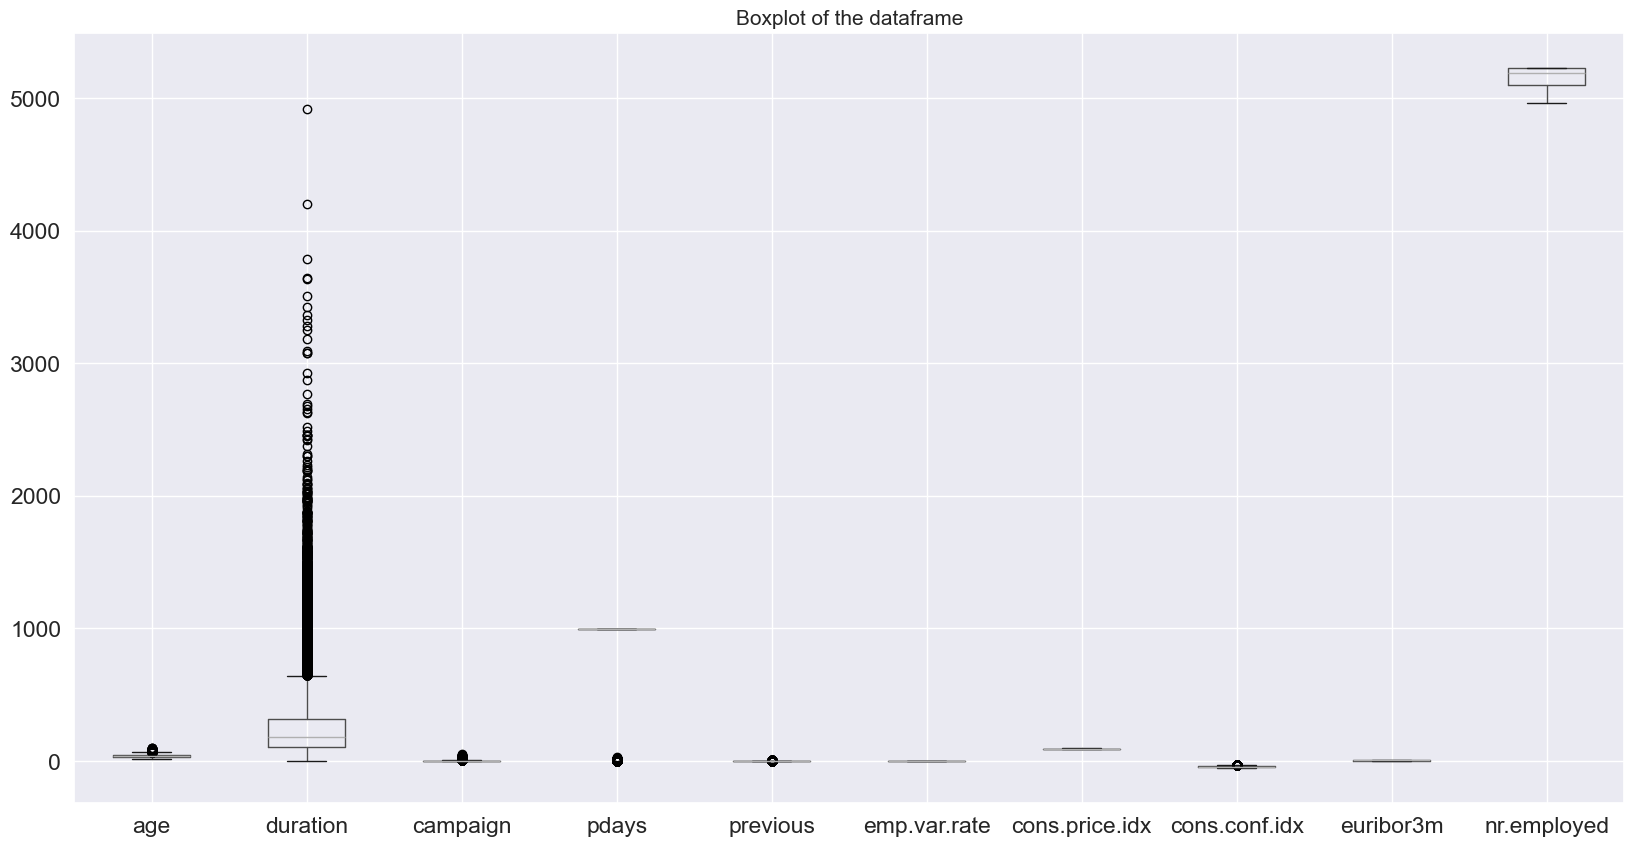

In [333]:
###Checking for outliers
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

In [334]:
# Outliers are not clearly visible from this plot for individual features. So lets plot the features separatly.

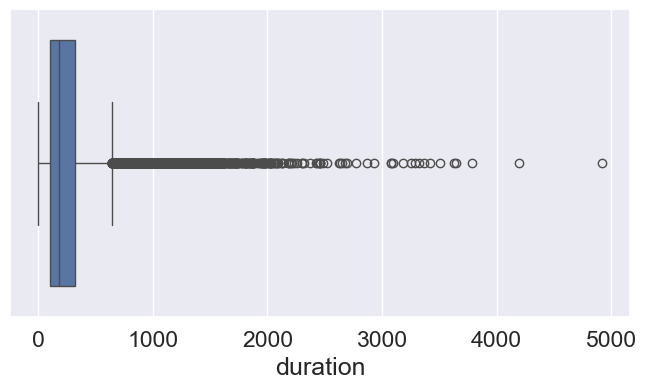

In [337]:
# boxplot for duration
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'])
plt.show()

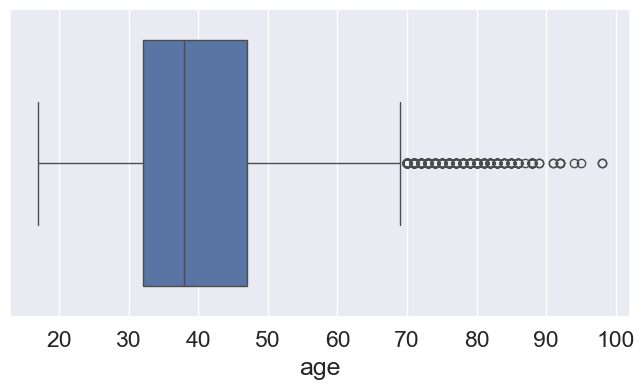

In [338]:
# boxplot for age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.show()

<Axes: xlabel='y', ylabel='age'>

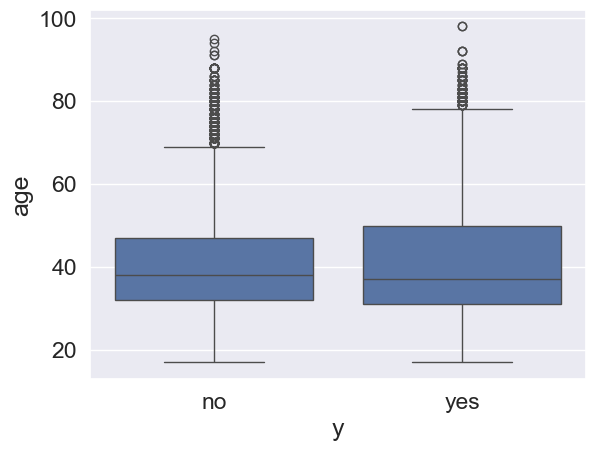

In [340]:
sns.boxplot(x = 'y', y = 'age', data = df)

In [343]:
#There is no much difference in age of people who subscribed term deposit and who do not

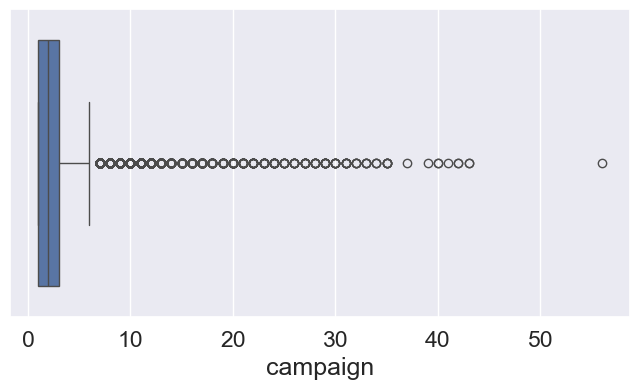

In [345]:
# # boxplot for campaign
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['campaign'])
plt.show()

In [347]:
#Lets find out outliers for these features

In [349]:
Q1_duration = df['duration'].quantile(.25)
Q3_duration = df['duration'].quantile(.75)
Q1_age = df['age'].quantile(.25)
Q3_age = df['age'].quantile(.75)
Q1_campaign = df['campaign'].quantile(.25)
Q3_campaign = df['campaign'].quantile(.75)

In [351]:
IQR_duration= Q3_duration - Q1_duration
IQR_age = Q3_age - Q1_age
IQR_campaign = Q3_campaign - Q1_campaign

lower_duration = Q1_duration - 1.5 * IQR_duration
upper_duration = Q3_duration + 1.5 * IQR_duration
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age
lower_campaign = Q1_campaign - 1.5 * IQR_campaign
upper_campaign = Q3_campaign + 1.5 * IQR_campaign

print(lower_duration,upper_duration)
print(lower_age,upper_age)
print(lower_campaign,upper_campaign)

-223.5 644.5
9.5 69.5
-2.0 6.0


In [353]:
df_outliers = df[df['duration'] >= lower_duration] 
df_outliers = df_outliers[df_outliers['duration'] <= upper_duration] 

df_outliers = df_outliers[df_outliers['age'] >= lower_age] 
df_outliers = df_outliers[df_outliers['age'] <= upper_age]

df_outliers = df_outliers[df_outliers['campaign'] >= lower_campaign] 
df_outliers = df_outliers[df_outliers['campaign'] <= upper_campaign] 

df = df_outliers

In [355]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,35462.000000,35462.000000,35462.000000,35462.000000,35462.000000,35462.000000,35462.000000,35462.000000,35462.000000,35462.000000
mean,39.602419,206.732643,2.044329,963.605465,0.174835,0.065769,93.566713,-40.522300,3.610043,5166.720684
std,9.678046,140.030314,1.284080,184.107947,0.493322,1.566772,0.576921,4.622438,1.731189,71.495789
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,170.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,280.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,644.000000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35462 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35462 non-null  int64  
 1   job             35462 non-null  object 
 2   marital         35462 non-null  object 
 3   education       35462 non-null  object 
 4   default         35462 non-null  object 
 5   housing         35462 non-null  object 
 6   loan            35462 non-null  object 
 7   contact         35462 non-null  object 
 8   month           35462 non-null  object 
 9   day_of_week     35462 non-null  object 
 10  duration        35462 non-null  int64  
 11  campaign        35462 non-null  int64  
 12  pdays           35462 non-null  int64  
 13  previous        35462 non-null  int64  
 14  poutcome        35462 non-null  object 
 15  emp.var.rate    35462 non-null  float64
 16  cons.price.idx  35462 non-null  float64
 17  cons.conf.idx   35462 non-null  floa

In [359]:
###Correlation table
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.002711  0.011725  0.002104 -0.019834   
duration        0.002711  1.000000 -0.056940 -0.073879  0.045691   
campaign        0.011725 -0.056940  1.000000  0.043499 -0.059201   
pdays           0.002104 -0.073879  0.043499  1.000000 -0.573832   
previous       -0.019834  0.045691 -0.059201 -0.573832  1.000000   
emp.var.rate    0.069855 -0.052000  0.095856  0.265070 -0.419998   
cons.price.idx  0.036043 -0.000429  0.073322  0.076627 -0.207871   
cons.conf.idx   0.102121  0.000382 -0.018057 -0.089746 -0.062032   
euribor3m       0.083040 -0.060308  0.079979  0.290324 -0.452805   
nr.employed     0.067623 -0.078503  0.091151  0.367581 -0.499276   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                 0.069855        0.036043       0.102121   0.083040   
duration           -0.052000       -0.000429       0.000382  -0.060308   
campaign            0.095856 

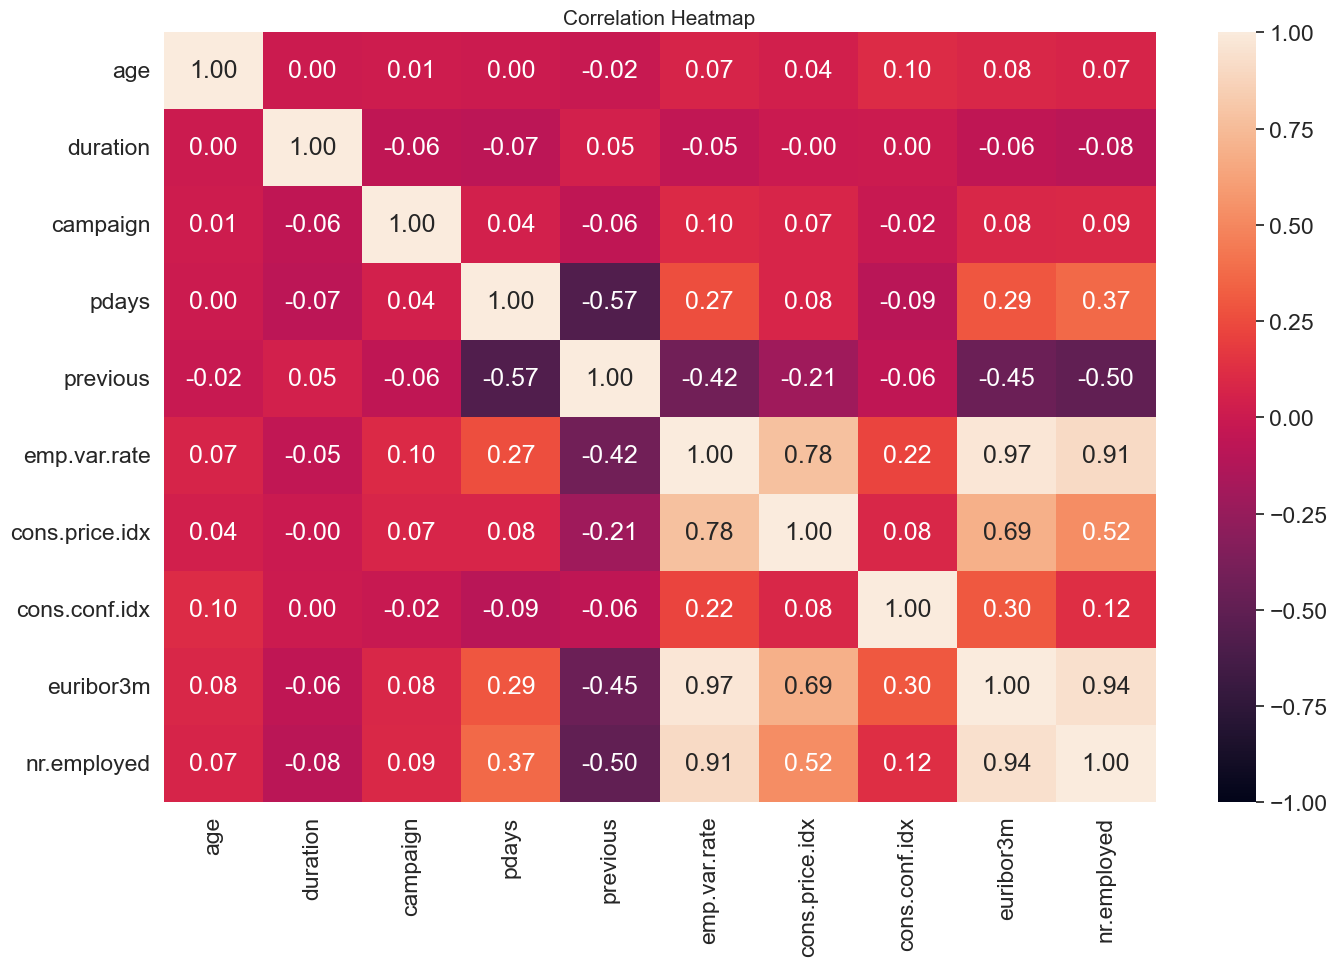

In [361]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,fmt='.2f')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

In [369]:
# Lets change yes to 1 and no to 0

df['y'] = df['y'].replace({'yes': 1, 'no': 0})

df.y.value_counts() 

y
0    32597
1     2865
Name: count, dtype: int64

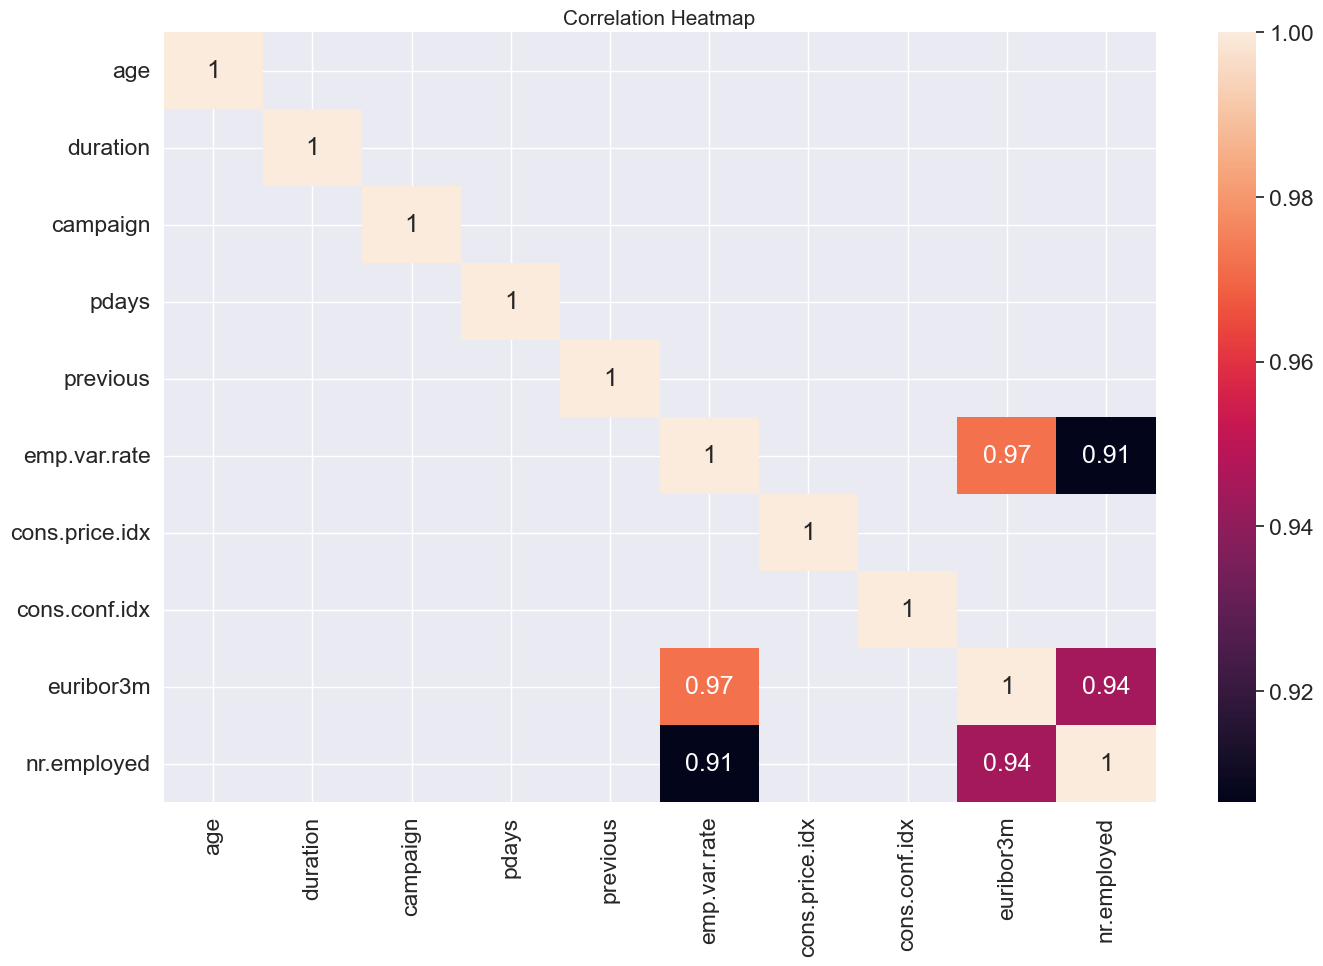

In [371]:
# Lets plot heatmap only for highly correlated features

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix[corr_matrix > 0.9], annot=True)
plt.title("Correlation Heatmap",  fontsize = 15)
plt.show()

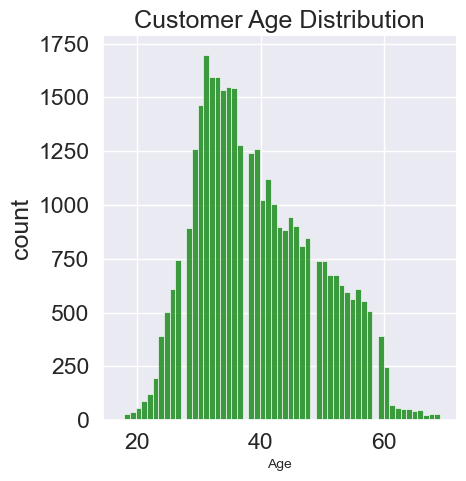

In [372]:
sns.displot(df['age'], color = 'green')
plt.title('Customer Age Distribution', fontsize = 18)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('count')
plt.show()

In [373]:
#People between age 25 and 50 have subscribed the term deposit

Text(0.5, 0, 'age')

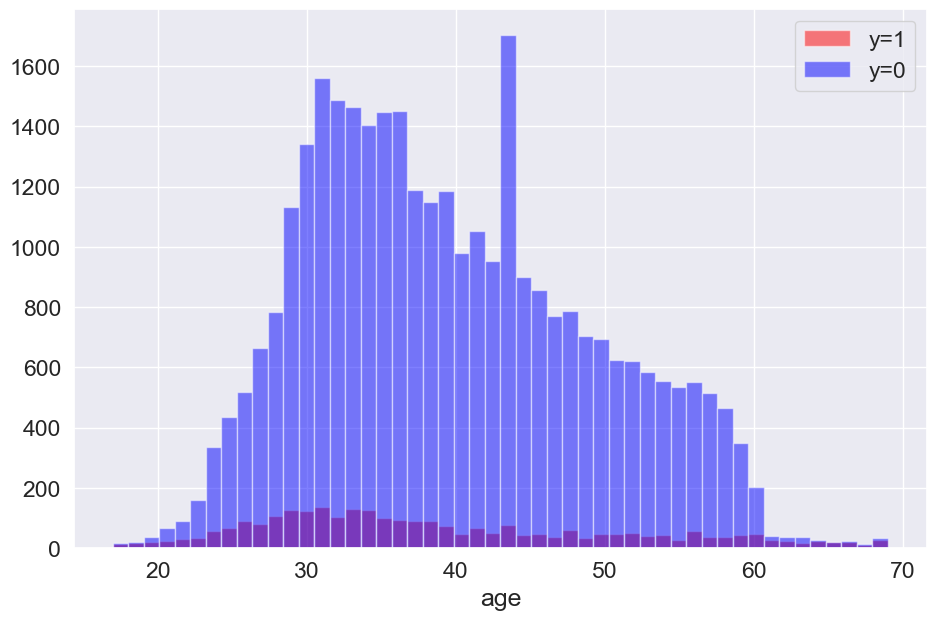

In [375]:
plt.figure(figsize=(11,7))
df[df['y']==1]['age'].hist(alpha = 0.5, color = 'red', bins= 50, label='y=1')
df[df['y']==0]['age'].hist(alpha = 0.5, color = 'blue', bins= 50, label='y=0')
plt.legend()
plt.xlabel('age')

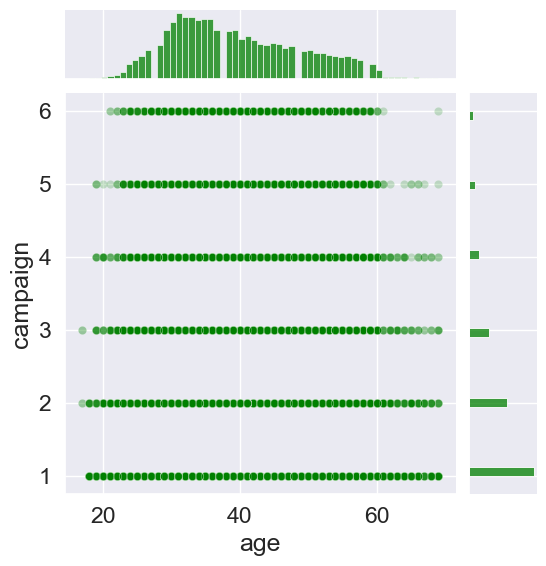

In [376]:
#Trend between age and campaign using jointplot

sns.jointplot(x='age', y='campaign', data=df, color = 'green', alpha=0.2)

In [379]:
#From the plot it looks like campaign was targeted at adult between age 25-50

## Modeling

In [381]:
cat_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


In [383]:
new_df = pd.get_dummies(df, columns = cat_list)


In [384]:
data = new_df.dropna()

In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35462 entries, 0 to 41186
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            35462 non-null  int64  
 1   duration                       35462 non-null  int64  
 2   campaign                       35462 non-null  int64  
 3   pdays                          35462 non-null  int64  
 4   previous                       35462 non-null  int64  
 5   emp.var.rate                   35462 non-null  float64
 6   cons.price.idx                 35462 non-null  float64
 7   cons.conf.idx                  35462 non-null  float64
 8   euribor3m                      35462 non-null  float64
 9   nr.employed                    35462 non-null  float64
 10  y                              35462 non-null  int64  
 11  job_admin.                     35462 non-null  bool   
 12  job_blue-collar                35462 non-null  bool

In [392]:
#Train Test Split

X = data.drop('y', axis=1)
y = data.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 555, test_size= 0.30)

In [394]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
24871,39,274,1,999,0,-0.1,93.200,-42.0,4.153,5195.8,...,False,False,False,False,False,True,False,False,True,False
19785,58,166,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,False,False,True,False,False,False,False,False,True,False
16164,53,639,3,999,0,1.4,93.918,-42.7,4.961,5228.1,...,False,False,False,False,False,True,False,False,True,False
5130,42,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,True,False,False,False,False,False,True,False
40447,25,188,1,3,3,-1.7,94.027,-38.3,0.904,4991.6,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
11031,45,37,3,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,True,False,True,False
29818,25,66,3,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,False,False,False,True,False,False,False,False,True,False
17984,40,225,3,999,0,1.4,93.918,-42.7,4.961,5228.1,...,False,False,False,False,False,True,False,False,True,False


In [396]:
X_test

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1939,35,268,2,999,0,1.1,93.994,-36.4,4.855,5191.0,...,False,False,True,False,False,False,False,False,True,False
39230,34,295,1,999,0,-1.8,93.369,-34.8,0.652,5008.7,...,False,False,False,False,False,True,False,False,True,False
14294,30,245,2,999,0,1.4,93.918,-42.7,4.962,5228.1,...,False,False,False,True,False,False,False,False,True,False
30109,52,139,2,999,0,-1.8,93.075,-47.1,1.384,5099.1,...,False,False,False,False,False,True,False,False,True,False
26642,46,352,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20427,51,121,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,False,False,False,False,False,True,False,False,True,False
25711,31,133,1,999,0,-0.1,93.200,-42.0,4.120,5195.8,...,False,False,False,False,False,False,True,False,True,False
23106,33,126,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,False,False,False,False,False,True,False,False,True,False
30482,59,233,2,999,0,-1.8,92.893,-46.2,1.354,5099.1,...,False,False,False,True,False,False,False,False,True,False


In [398]:
y_train

24871    0
19785    0
16164    0
5130     0
40447    0
        ..
250      0
11031    0
29818    0
17984    0
5397     0
Name: y, Length: 24823, dtype: int64

In [400]:
y_test

1939     0
39230    1
14294    0
30109    0
26642    0
        ..
20427    0
25711    0
23106    0
30482    0
11950    0
Name: y, Length: 10639, dtype: int64

In [427]:
#Use standard scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [429]:
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9409718958548736
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      9789
           1       0.70      0.46      0.56       850

    accuracy                           0.94     10639
   macro avg       0.83      0.72      0.76     10639
weighted avg       0.93      0.94      0.94     10639



In [430]:
dt = DecisionTreeClassifier()

# fitting the model
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.9153115894350973
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      9789
           1       0.47      0.50      0.48       850

    accuracy                           0.92     10639
   macro avg       0.71      0.73      0.72     10639
weighted avg       0.92      0.92      0.92     10639



In [433]:
lr = LogisticRegression(max_iter=1000, random_state=42)

# fitting the model
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.9396559827051415
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      9789
           1       0.69      0.44      0.54       850

    accuracy                           0.94     10639
   macro avg       0.82      0.71      0.75     10639
weighted avg       0.93      0.94      0.93     10639



In [435]:
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.9238650249083561
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      9789
           1       0.53      0.36      0.43       850

    accuracy                           0.92     10639
   macro avg       0.74      0.67      0.70     10639
weighted avg       0.91      0.92      0.92     10639



In [437]:
svc = svm.SVC(kernel='linear')

# fitting the model
svc.fit(X_train,y_train)
y_pred_svc = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

Accuracy: 0.9238650249083561
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      9789
           1       0.53      0.36      0.43       850

    accuracy                           0.92     10639
   macro avg       0.74      0.67      0.70     10639
weighted avg       0.91      0.92      0.92     10639

